Principal Component Analysis (PCA) is a powerful dimensionality reduction technique (reduces the curse of dimensionality). Its main goal is to transform a dataset with potentially correlated variables/dimensions into a new set of uncorrelated variables called principal components (PCs). These principal components are ordered by the amount of variance they explain in the original data.

Why Use PCA in the preprocessing phase?

* Dimensionality Reduction: Simplifies complex datasets by reducing the
number of variables, making analysis and modeling more manageable and less computationally expensive.
*Noise Reduction: Less important principal components often correspond to noise in the data. Discarding these can lead to a cleaner representation.
-Data Visualization: Reduces high-dimensional data to 2D or 3D, making it possible to visualize patterns and clusters.
*Feature Extraction: Creates new, **uncorrelated features** that can improve the performance of some machine learning algorithms by addressing multicollinearity.
*Improved Algorithm Performance (reduce overfitting): Can help prevent overfitting and improve the speed and stability of certain algorithms.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#!git clone https://github.com/Abudo-S/GenericML.git

Cloning into 'GenericML'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 30 (delta 7), reused 20 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (30/30), 3.92 MiB | 2.53 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [2]:
from numpy import linalg as LA
from sklearn.datasets import load_iris

We use the iris dataset available in sklearn

In [3]:
iris = load_iris()

The dataset is split in the matrix of datapoint and the vector of labels

In [4]:
Xh = iris.data
y = iris.target
X = Xh.T

We apply SVD to the data part.
Before applying SVD for PCA, it's crucial to center the data. This involves subtracting the mean of each feature from all the data points for that feature. Let X be our m×n data matrix (m samples, n features). We create a new centered matrix B where each column has a mean of zero.  

* Applying Singular Value Decomposition:

  We then compute the SVD of the centered data matrix B: B=UΣVT Where:
  U is an m×m unitary matrix whose columns are the left-singular vectors.   

  Σ is an m×n diagonal matrix with non-negative real numbers on the diagonal, called the singular values (σ1​≥σ2​≥</2>...≥σn​≥0).
  VT is the transpose of an n×n unitary matrix V, whose columns are the right-singular vectors.

* Relationship to Principal Components:

  Right-Singular Vectors (V): The columns of the matrix V (or rows of VT) are the principal components (PCs) of the original data. Each column of V represents a direction in the original feature space that corresponds to a principal component. The first column of V is the first principal component, the second column is the second principal component, and so on. These are the same eigenvectors you would obtain from the eigendecomposition of the covariance matrix of the centered data (BTB).

In [5]:
U, s, Vh = LA.svd(X, full_matrices=False)
U.shape, s.shape, Vh.shape

((4, 4), (4,), (4, 150))

The data are projected onto the two principal directions

In [10]:
P = U[:,:2]
#@: the infix operator for matrix dot multiplication
R = P.T @ X
plt.scatter(R[0,:], R[1,:], c=y)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 150 is different from 4)

In [7]:
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay

We define a new data matrix containing only the two principal directions (most variant PCs of PCA)

In [8]:
n_neighbors = 49 # here we select the k in k-NN

X = R[:2,:].T

We plot the decision surfaces along with the datapoints

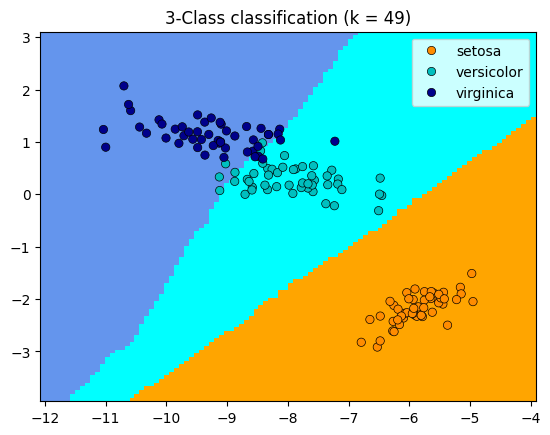

In [9]:
# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

clf = neighbors.KNeighborsClassifier(n_neighbors, weights="uniform")
clf.fit(X, y)

_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=cmap_light,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    )

sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )

plt.title(
    "3-Class classification (k = %i)" % n_neighbors
    )

plt.show()